# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = (train['features']), train['labels']
X_train = (X_train - X_train.mean()) / (X_train.std() + 1e-8)
X_test, y_test = (test['features']), test['labels']
X_test = (X_test - X_test.mean()) / (X_test.std() + 1e-8)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

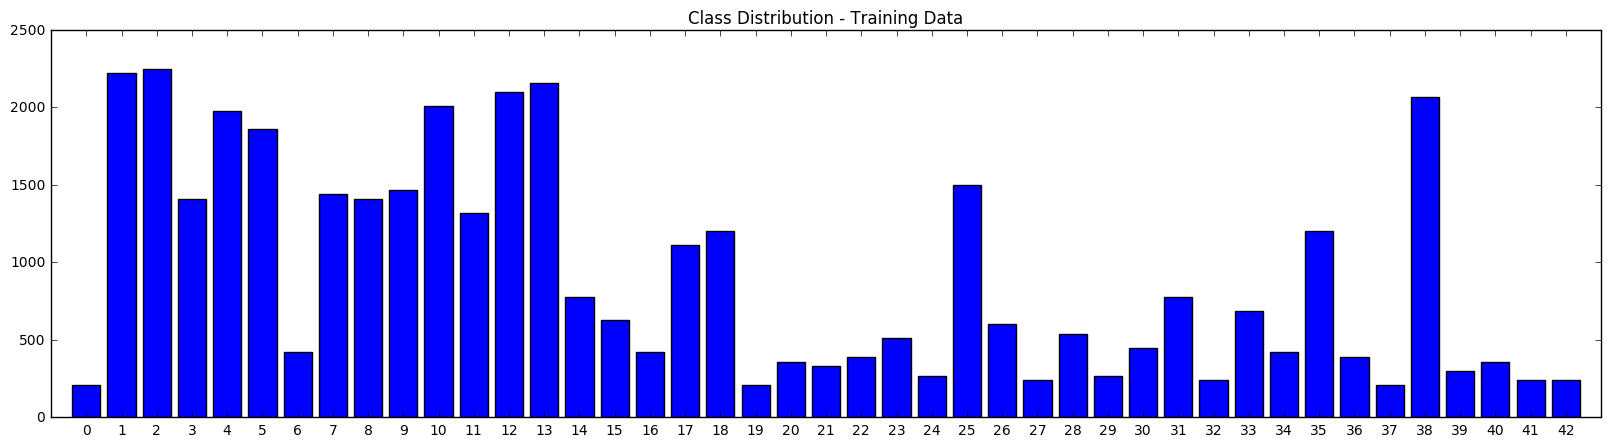

In [4]:
#PLotting the class distribution of the Training Data
labels, count = np.unique(y_train, return_counts=True)

# Plot the histogram
plt.rcParams["figure.figsize"] = [20, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(labels, count, tick_label=labels, width=0.8, align='center')
plt.title('Class Distribution - Training Data')
plt.show()

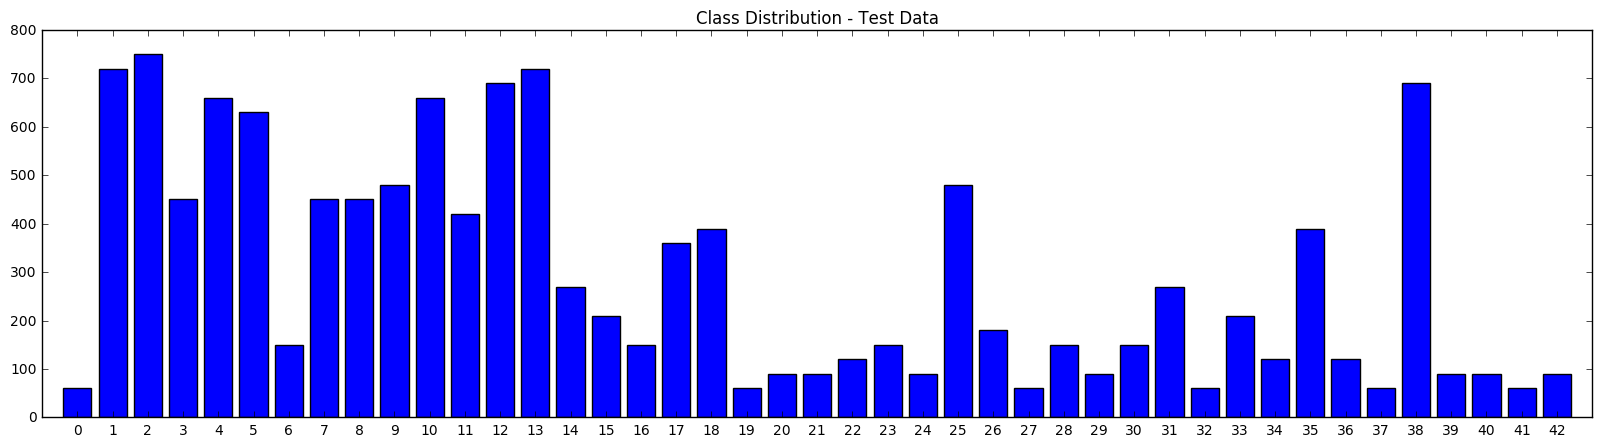

In [5]:
#PLotting the class distribution of the Training Data
labels, count = np.unique(y_test, return_counts=True)

# Plot the histogram
plt.rcParams["figure.figsize"] = [20, 5]
axes = plt.gca()
axes.set_xlim([-1,43])

plt.bar(labels, count, tick_label=labels, width=0.8, align='center')
plt.title('Class Distribution - Test Data')
plt.show()

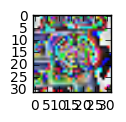

0


KeyboardInterrupt: 

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
from IPython.display import clear_output
import time 
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
for index in range(0,len(X_train)):
    image = X_train[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()
    plt.pause(0.1)
    print(y_train[index])
    time.sleep(1)
    clear_output()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I did the normalization of images by subtracting mean of the images and dividing by (standard deviation + 1e-8). This step basically centres the pixel values around the mean and distributes them according to their standard deviation with a slight bias of 1e-8 which creates a bell curve like distribution. This helps the gradient descent converge faster. 

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

print("Updated Image Shape: ()".format(X_train[0].shape))

Updated Image Shape: ()


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The dataset was divided into training and test sets using a 80/20 divide rule using the train_test_split from sklearn library. 

In [8]:
import tensorflow as tf

EPOCHS = 14
BATCH_SIZE = 128

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 3: Convolutional. Output = 4x4x32.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(2, 2, 16, 32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 4x4x32. Output = 3x3x32.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 3x3x32. Output = 128.
    fc0 = flatten(conv3)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 288. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(288, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture is pretty much based on the LeNet architecture with addition of one convolutional, ReLu and Pooling layer. The architecture is as follows: 

Input (32x32x1) -> Convolutional Layer 1 -> Output(28x28x6) -> ReLu1 -> Pooling Layer 1 -> Output(14x14x6) -> 
Convolutional Layer 2 -> Output(10x10x16) -> ReLu2 -> Pooling Layer 2 -> Output(5x5x16) -> Convolutional Layer 3 ->
Output(4x4x32) -> ReLu3 -> Pooling Layer 3 -> Output(3x3x32) -> Flatenning -> Output(288) -> Fully Connected Layer 1 -> Output(120) -> ReLu4 -> Fully Connected Layer2 -> Output(84) -> ReLu5 -> Fully Connected Layer3 -> Output(43) 

For regularization, I used L2 regularization to prevent the overfitting. I preferred L2 over L1 as in most practical cases, L2 performs way better than L1.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.

rate = 0.001 

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss = tf.reduce_mean(cross_entropy)

reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
reg_constant = 0.001  

loss_operation = loss + reg_constant * sum(reg_losses)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [39]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.685

EPOCH 2 ...
Validation Accuracy = 0.850

EPOCH 3 ...
Validation Accuracy = 0.921

EPOCH 4 ...
Validation Accuracy = 0.947

EPOCH 5 ...
Validation Accuracy = 0.948

EPOCH 6 ...
Validation Accuracy = 0.953

EPOCH 7 ...
Validation Accuracy = 0.966

EPOCH 8 ...
Validation Accuracy = 0.959

EPOCH 9 ...
Validation Accuracy = 0.974

EPOCH 10 ...
Validation Accuracy = 0.976

EPOCH 11 ...
Validation Accuracy = 0.968

EPOCH 12 ...
Validation Accuracy = 0.981

EPOCH 13 ...
Validation Accuracy = 0.946

EPOCH 14 ...
Validation Accuracy = 0.980

Model saved


In [40]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.922


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I did not play with the type of optimizers and took the adam optimizer which has been used in the LeNet Lab. Plus given the fact that Adam OPtimizer performs better than the SGD, I decided to go with it. 

I used 14 epochs and 128 as the batch size. These were decided after varying the number of epochs from 8-15 and the best one turned out to be 14. SImilar procedure was used to decide the batch size. 

I tried varying the hyperparameters i.e mu, sigma and the learning rate from the values that were used in the LeNet architecture but it didn't prove to be really useful so I decide to go with the same values.
mu = 0
sigma = 0.1 
Learning rate = 0.001

The L2 regularization constant (beta) was taken to be 0.001.

The training procedure begaon with getting the logits from the neural net and doing a cross entropy between the logits and the one hot encoded values which was followed by loss computation involving L2 regularization. After this the optimization of the loss was done using the Adam optimizer. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I decided to base my architecture on the given LeNet and try to reach maximum possible accuracy using techniques like normalization, regularization, tuning hyperparameters, varying epochs, learning rates and batch sizes before making any changes to the architecture. Once I was done with this optimization, I decided to start making changes to the network by adding layers. I added a convolutional, relu and pooling layers to the LeNet architecture. All these steps led to a validation accuracy of somewhere around 98% which was satisfactory enough. I also felt going with a simple architecture like LeNet made me try other techniques which helped in overall learning plus achieving an accuracy of 98% with a simple architecture proved that it was sufficient enough for this problem.  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
IMG_SIZE = 32

image_files  = ['sample_images/' + image_file for image_file in os.listdir('sample_images')]
images = []
for image_file in image_files:
    image = Image.open(image_file)
    image = image.convert('RGB')
    image = image.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    image = np.array(list(image.getdata()), dtype='uint8')
    image = np.reshape(image, (32, 32, 3))

    images.append(image)
images = np.array(images, dtype='uint8')

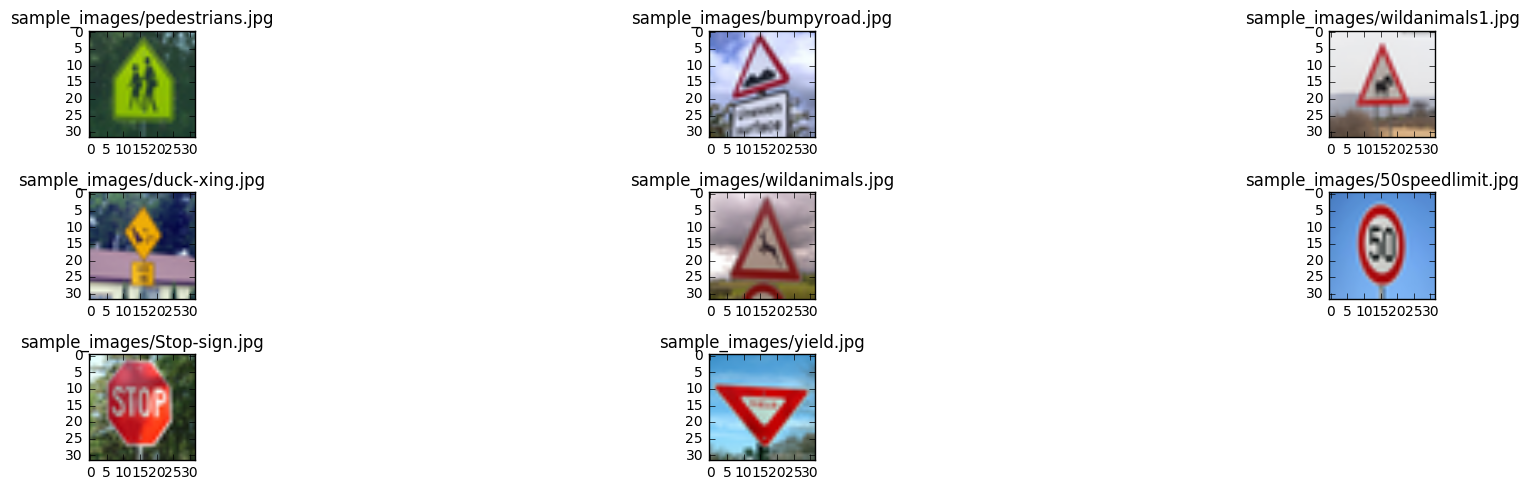

In [15]:
for i, image in enumerate(images):
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(image_files[i])

plt.tight_layout()
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I chose 8 images which included easy to identify images like the stop and the yield signs to slightly difficult signs like bumpy road and 50kmph speed limit to signs which can involve confusion even in the humans like the children crossing which can be confused with pedestrian crossing, variuos animal signs which can create a confusion too. 

In [19]:
import csv
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    class_names = dict(reader)

In [26]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
images = (images - images.mean()) / (images.std() + 1e-8)
no_of_imgs = 8
    
#new_pics_labels = [28, 22, 31, 31, 31, 2, 14, 13]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    # model evaluation
    prediction = tf.argmax(logits, 1)

    test_prediction = sess.run(
        prediction,
        feed_dict={x: images})
    
    lgts = sess.run(
        logits,
        feed_dict={x: images})
    
for i in range(no_of_imgs):
    print('Prediction: {} \t| {}'.format(test_prediction[i], 
                                            class_names[str(test_prediction[i])]))    

Prediction: 11 	| Right-of-way at the next intersection
Prediction: 11 	| Right-of-way at the next intersection
Prediction: 11 	| Right-of-way at the next intersection
Prediction: 13 	| Yield
Prediction: 2 	| Speed limit (50km/h)
Prediction: 2 	| Speed limit (50km/h)
Prediction: 14 	| Stop
Prediction: 13 	| Yield


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

No the model didn't perform equally well as it did on the test set. The accuracy achieved was 37.5% on the new images whereas the test accuracy was around 92%. 

The network was able to identify easy signs like the stop and the yield signs but it faultered at confusing signs like the wild animal signs. It was able to coorectly identify the 50 kmph sign but faultered in the wild animals signs and the children crossing signs. 

In [27]:
# Load signnames.csv to map label number to sign string
label_map = {}
with open('signnames.csv', 'r') as f:
    first_line = True
    for line in f:
        # Ignore first line
        if first_line:
            first_line = False
            continue

        # Populate label_map
        label_int, label_string = line.split(',')
        label_int = int(label_int)

        label_map[label_int] = label_string

In [28]:
# Use TensorFlow's softmax and top_k functions
with tf.Graph().as_default(), tf.Session() as sess:
    logits = tf.placeholder('float', [None, 43])
    softmax = tf.nn.softmax(logits)
    top_k_val, top_k_idx = tf.nn.top_k(softmax, k=8)
    
    top_k_vals, top_k_idxs = sess.run([top_k_val, top_k_idx], feed_dict={logits: lgts})

In [29]:
def display_pred_certainty(image, top_k_val, top_k_idx):
    print('Top 5 predictions for the following image (prediction: probability)')
    # Convert top k indices into strings
    top_k_pred = [label_map[idx] for idx in top_k_idx]
    
    # Show the image for reference
    plt.imshow(image)
    plt.show()
    
    for i in range(5):
        print('%s: %.2f%%' % (top_k_pred[i].replace('\n', ''), top_k_val[i] * 100))

In [30]:
IMG_SIZE = 32

image_files  = ['sample_images/' + image_file for image_file in os.listdir('sample_images')]
images = []
for image_file in image_files:
    image = Image.open(image_file)
    image = image.convert('RGB')
    image = image.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    image = np.array(list(image.getdata()), dtype='uint8')
    image = np.reshape(image, (32, 32, 3))

    images.append(image)
images = np.array(images, dtype='uint8')

Top 5 predictions for the following image (prediction: probability)


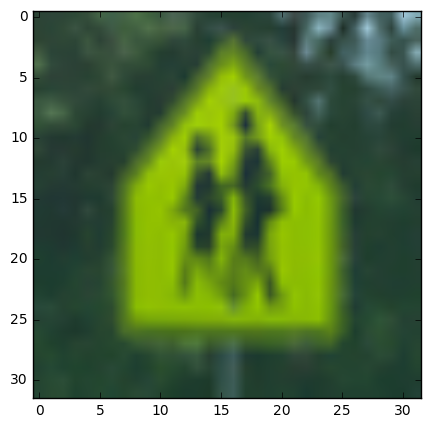

Right-of-way at the next intersection: 99.10%
Slippery road: 0.29%
Children crossing: 0.15%
Speed limit (80km/h): 0.15%
Speed limit (60km/h): 0.11%


In [31]:
i = 0
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

The network totally faulters in detecting the children crossing sign and only sees a 0.15% chance of getting it right. This could be a possibility because of similar features of the arrows in the right of way at next intersection as compared to the children in this sign which confuses it.

Top 5 predictions for the following image (prediction: probability)


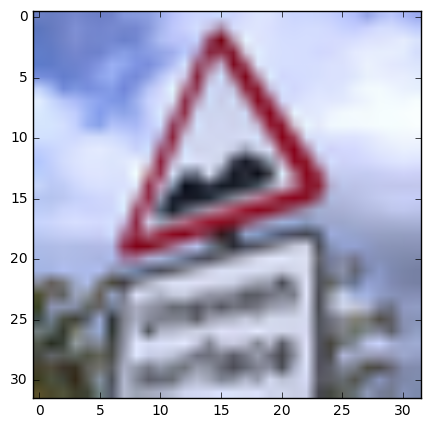

Right-of-way at the next intersection: 94.93%
Dangerous curve to the right: 5.07%
Priority road: 0.00%
Slippery road: 0.00%
End of speed limit (80km/h): 0.00%


In [32]:
i = 1
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

The network totally faulters in detecting the bumpy road sign and again detects the right of way at next intersection. 

Top 5 predictions for the following image (prediction: probability)


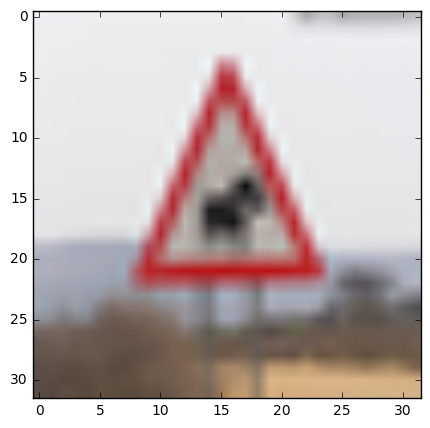

Right-of-way at the next intersection: 54.17%
Beware of ice/snow: 21.98%
Dangerous curve to the right: 10.99%
No entry: 8.31%
Slippery road: 4.46%


In [33]:
i = 2
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

The network is not able to detect the wild animal sign and infact its not even in it's top 5 predictions. Again the top prediction is right of way. 

Top 5 predictions for the following image (prediction: probability)


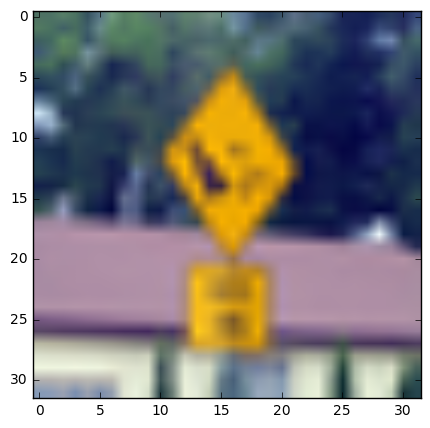

Yield: 93.08%
Dangerous curve to the right: 6.49%
Children crossing: 0.40%
No passing: 0.02%
Right-of-way at the next intersection: 0.00%


In [34]:
i = 3
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

Top 5 predictions for the following image (prediction: probability)


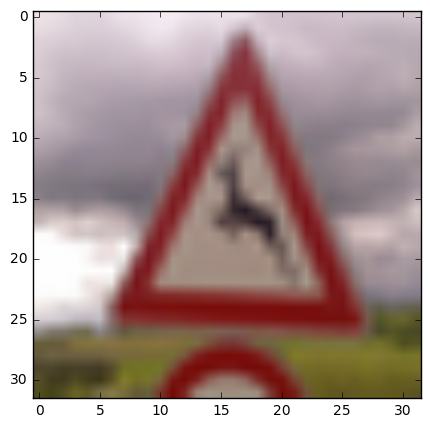

Speed limit (50km/h): 52.37%
Wild animals crossing: 44.80%
Speed limit (80km/h): 1.03%
Right-of-way at the next intersection: 0.58%
Road narrows on the right: 0.56%


In [35]:
i = 4
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

The network has the wild animals prediction at the second rank (44.8%) which is good enough and it gets confused with 50 kmph speed limit sign probably because of the round sign below the wild animal sign. This shows that the deer wild animal sign is featured a lot more than the other wild animal signs and network is way more confident about it. 

Top 5 predictions for the following image (prediction: probability)


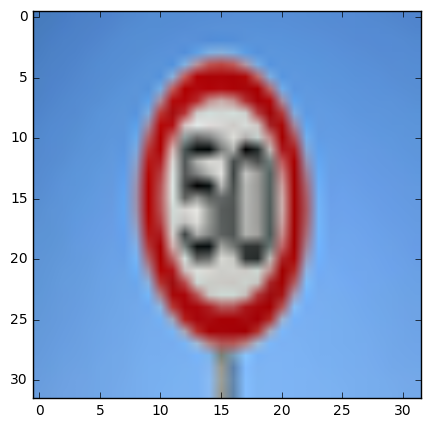

Speed limit (50km/h): 99.27%
Speed limit (30km/h): 0.73%
Speed limit (80km/h): 0.00%
Speed limit (60km/h): 0.00%
Speed limit (20km/h): 0.00%


In [36]:
i = 5
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

Top 5 predictions for the following image (prediction: probability)


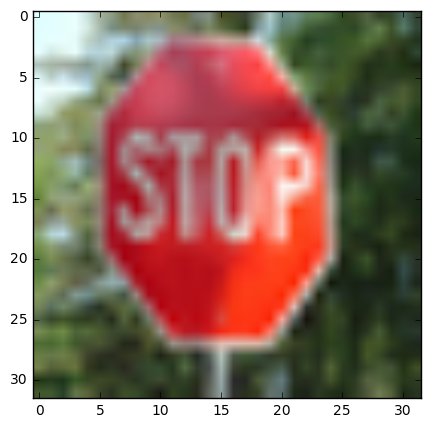

Stop: 100.00%
No entry: 0.00%
Yield: 0.00%
Speed limit (60km/h): 0.00%
General caution: 0.00%


In [37]:
i = 6
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

Top 5 predictions for the following image (prediction: probability)


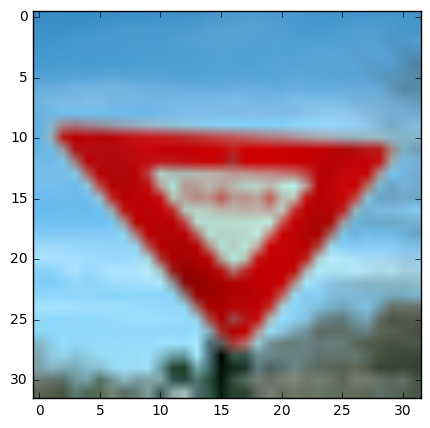

Yield: 100.00%
Speed limit (30km/h): 0.00%
No passing: 0.00%
Speed limit (60km/h): 0.00%
Speed limit (50km/h): 0.00%


In [38]:
i = 7
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

The network is 100% sure of the easy signs like the 50kmph speed limit, yield and stop signs which shows that these signs are featured a lot in the training dataset plus the other new signs at which the network faulters might be a lack of good dataset and not a problem with the network. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Please check the comments above which I have written below the to 5 predictions for each image done. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.